In [124]:
import pandas as pd
import tensorflow as tf
import numpy as np
import keras_tuner as kt
import matplotlib.pyplot as plt

In [125]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [126]:
pd.set_option('display.max_columns', None)

In [127]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

In [128]:
raw_data_benign = load_data("Power_System_Data/cyberphysical_Benign.csv")
raw_data_benign.head()

,frame.time,eth.src,eth.dst,ip.src,ip.dst,_ws.col.Protocol,ip.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,PLCID,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD
0,"Sep 10, 2024 15:45:37.334723000 CDT",02:42:c0:a8:06:14,02:42:c0:a8:06:0a,192.168.6.20,192.168.6.10,Modbus/TCP,64.0,47582.0,502.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,"Sep 10, 2024 15:45:37.335540000 CDT",02:42:c0:a8:06:0a,02:42:c0:a8:06:14,192.168.6.10,192.168.6.20,Modbus/TCP,65.0,502.0,47582.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,"Sep 10, 2024 15:45:37.335554000 CDT",02:42:c0:a8:06:14,02:42:c0:a8:06:0a,192.168.6.20,192.168.6.10,TCP,52.0,47582.0,502.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,"Sep 10, 2024 15:45:37.335714000 CDT",02:42:c0:a8:06:14,02:42:c0:a8:06:0a,192.168.6.20,192.168.6.10,Modbus/TCP,64.0,47582.0,502.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,"Sep 10, 2024 15:45:37.336032000 CDT",02:42:c0:a8:06:0a,02:42:c0:a8:06:14,192.168.6.10,192.168.6.20,Modbus/TCP,65.0,502.0,47582.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [129]:
raw_data_FDI = load_data("Power_System_Data/cyberphysical_FDI_labeled.csv")
raw_data_FDI.head()

,frame.time,eth.src,eth.dst,ip.src,ip.dst,_ws.col.Protocol,ip.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,PLCID,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label
0,"Sep 10, 2024 17:17:30.655099000 CDT",02:42:c0:a8:03:14,02:42:c0:a8:03:0a,192.168.3.20,192.168.3.10,Modbus/TCP,64.0,41442.0,502.0,NaN,NaN,12,"65,440",32,1.288,"-6,112,586","-1,599,928",-,-,-,-,-,-,-,-,-,-,"212,578,176","349,222,304",-,-,-,-,-,-,-,-,-,-,"-218,690,000","-350,820,416",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
1,"Sep 10, 2024 17:17:30.655394000 CDT",02:42:c0:a8:03:0a,02:42:c0:a8:03:14,192.168.3.10,192.168.3.20,Modbus/TCP,61.0,502.0,41442.0,NaN,NaN,12,"65,440",32,1.288,"-6,112,586","-1,599,928",-,-,-,-,-,-,-,-,-,-,"212,578,176","349,222,304",-,-,-,-,-,-,-,-,-,-,"-218,690,000","-350,820,416",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
2,"Sep 10, 2024 17:17:30.656029000 CDT",02:42:c0:a8:03:14,02:42:c0:a8:03:03,192.168.3.20,192.168.23.4,TLSv1.2,760.0,36314.0,9200.0,NaN,NaN,12,"65,440",32,1.288,"-6,112,586","-1,599,928",-,-,-,-,-,-,-,-,-,-,"212,578,176","349,222,304",-,-,-,-,-,-,-,-,-,-,"-218,690,000","-350,820,416",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
3,"Sep 10, 2024 17:17:30.656047000 CDT",02:42:0a:01:03:04,02:42:0a:01:03:03,10.1.3.4,192.168.23.4,TLSv1.2,760.0,36314.0,9200.0,NaN,NaN,12,"65,440",32,1.288,"-6,112,586","-1,599,928",-,-,-,-,-,-,-,-,-,-,"212,578,176","349,222,304",-,-,-,-,-,-,-,-,-,-,"-218,690,000","-350,820,416",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
4,"Sep 10, 2024 17:17:30.660085000 CDT",02:42:0a:01:03:03,02:42:0a:01:03:04,192.168.23.4,10.1.3.4,TLSv1.2,495.0,9200.0,36314.0,NaN,NaN,12,"65,440",32,1.288,"-6,112,586","-1,599,928",-,-,-,-,-,-,-,-,-,-,"212,578,176","349,222,304",-,-,-,-,-,-,-,-,-,-,"-218,690,000","-350,820,416",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0


In [130]:
raw_data_ransom = load_data("Power_System_Data/cyberphysical_Ransom_labeled.csv")
raw_data_ransom.head()

,frame.time,eth.src,eth.dst,ip.src,ip.dst,_ws.col.Protocol,ip.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,PLCID,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label
0,"Sep 11, 2024 15:41:52.026066000 CDT",02:42:c0:a8:04:14,02:42:c0:a8:04:0a,192.168.4.20,192.168.4.10,Modbus/TCP,64.0,46010.0,502.0,NaN,NaN,13,"65,503",74,2.352,"-13,512,875","-5,800,001",-,-,-,-,-,-,-,-,-,-,"218,723,728","230,035,152",-,-,-,-,-,-,-,-,"-663,491,712","-876,173,696",-,-,"431,255,104","640,338,560",-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
1,"Sep 11, 2024 15:41:52.026559000 CDT",02:42:c0:a8:04:0a,02:42:c0:a8:04:14,192.168.4.10,192.168.4.20,Modbus/TCP,61.0,502.0,46010.0,NaN,NaN,13,"65,503",74,2.352,"-13,512,875","-5,800,001",-,-,-,-,-,-,-,-,-,-,"218,723,728","230,035,152",-,-,-,-,-,-,-,-,"-663,491,712","-876,173,696",-,-,"431,255,104","640,338,560",-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
2,"Sep 11, 2024 15:41:52.027691000 CDT",02:42:c0:a8:04:14,02:42:c0:a8:04:03,192.168.4.20,192.168.23.4,TLSv1.2,794.0,53566.0,9200.0,NaN,NaN,13,"65,503",74,2.352,"-13,512,875","-5,800,001",-,-,-,-,-,-,-,-,-,-,"218,723,728","230,035,152",-,-,-,-,-,-,-,-,"-663,491,712","-876,173,696",-,-,"431,255,104","640,338,560",-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
3,"Sep 11, 2024 15:41:52.027707000 CDT",02:42:0a:01:04:04,02:42:0a:01:04:03,10.1.4.4,192.168.23.4,TLSv1.2,794.0,53566.0,9200.0,NaN,NaN,13,"65,503",74,2.352,"-13,512,875","-5,800,001",-,-,-,-,-,-,-,-,-,-,"218,723,728","230,035,152",-,-,-,-,-,-,-,-,"-663,491,712","-876,173,696",-,-,"431,255,104","640,338,560",-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
4,"Sep 11, 2024 15:41:52.031188000 CDT",02:42:0a:01:04:03,02:42:0a:01:04:04,192.168.23.4,10.1.4.4,TLSv1.2,495.0,9200.0,53566.0,NaN,NaN,13,"65,503",74,2.352,"-13,512,875","-5,800,001",-,-,-,-,-,-,-,-,-,-,"218,723,728","230,035,152",-,-,-,-,-,-,-,-,"-663,491,712","-876,173,696",-,-,"431,255,104","640,338,560",-,-,-,-,-,-,-,-,-,-,-,-,-,-,0


In [131]:
raw_data_benign['label'] = 0
raw_data_benign.head()

,frame.time,eth.src,eth.dst,ip.src,ip.dst,_ws.col.Protocol,ip.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,PLCID,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label
0,"Sep 10, 2024 15:45:37.334723000 CDT",02:42:c0:a8:06:14,02:42:c0:a8:06:0a,192.168.6.20,192.168.6.10,Modbus/TCP,64.0,47582.0,502.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
1,"Sep 10, 2024 15:45:37.335540000 CDT",02:42:c0:a8:06:0a,02:42:c0:a8:06:14,192.168.6.10,192.168.6.20,Modbus/TCP,65.0,502.0,47582.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
2,"Sep 10, 2024 15:45:37.335554000 CDT",02:42:c0:a8:06:14,02:42:c0:a8:06:0a,192.168.6.20,192.168.6.10,TCP,52.0,47582.0,502.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
3,"Sep 10, 2024 15:45:37.335714000 CDT",02:42:c0:a8:06:14,02:42:c0:a8:06:0a,192.168.6.20,192.168.6.10,Modbus/TCP,64.0,47582.0,502.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
4,"Sep 10, 2024 15:45:37.336032000 CDT",02:42:c0:a8:06:0a,02:42:c0:a8:06:14,192.168.6.10,192.168.6.20,Modbus/TCP,65.0,502.0,47582.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0


In [132]:
raw_combined_data = pd.concat([raw_data_benign, raw_data_FDI, raw_data_ransom])
raw_combined_data.head()

,frame.time,eth.src,eth.dst,ip.src,ip.dst,_ws.col.Protocol,ip.len,tcp.srcport,tcp.dstport,udp.srcport,udp.dstport,PLCID,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label
0,"Sep 10, 2024 15:45:37.334723000 CDT",02:42:c0:a8:06:14,02:42:c0:a8:06:0a,192.168.6.20,192.168.6.10,Modbus/TCP,64.0,47582.0,502.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
1,"Sep 10, 2024 15:45:37.335540000 CDT",02:42:c0:a8:06:0a,02:42:c0:a8:06:14,192.168.6.10,192.168.6.20,Modbus/TCP,65.0,502.0,47582.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
2,"Sep 10, 2024 15:45:37.335554000 CDT",02:42:c0:a8:06:14,02:42:c0:a8:06:0a,192.168.6.20,192.168.6.10,TCP,52.0,47582.0,502.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
3,"Sep 10, 2024 15:45:37.335714000 CDT",02:42:c0:a8:06:14,02:42:c0:a8:06:0a,192.168.6.20,192.168.6.10,Modbus/TCP,64.0,47582.0,502.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
4,"Sep 10, 2024 15:45:37.336032000 CDT",02:42:c0:a8:06:0a,02:42:c0:a8:06:14,192.168.6.10,192.168.6.20,Modbus/TCP,65.0,502.0,47582.0,NaN,NaN,11,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0


In [133]:
count_label_1 = (raw_combined_data['label'] == 1).sum()

# Count where label == 0
count_label_0 = (raw_combined_data['label'] == 0).sum()

print(f"Attacked entries: {count_label_1}")
print(f"Benign entries: {count_label_0}")

Attacked entries: 157643
Benign entries: 166825


In [134]:
clean_combined_data = raw_combined_data.drop(raw_combined_data[(raw_combined_data['udp.srcport'].notna())].index, inplace=False)

In [135]:
clean_combined_data = clean_combined_data.drop(columns = ['udp.srcport', 'udp.dstport', 'PLCID'])

In [136]:
unique_values = pd.Series(pd.concat([clean_combined_data['eth.src'], clean_combined_data['eth.dst']]).unique())
encoding_map = {value: code for code, value in enumerate(unique_values)}
clean_combined_data['eth.src'] = clean_combined_data['eth.src'].map(encoding_map)
clean_combined_data['eth.dst'] = clean_combined_data['eth.dst'].map(encoding_map)

In [137]:
clean_combined_data.head()

,frame.time,eth.src,eth.dst,ip.src,ip.dst,_ws.col.Protocol,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label
0,"Sep 10, 2024 15:45:37.334723000 CDT",0,1,192.168.6.20,192.168.6.10,Modbus/TCP,64.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
1,"Sep 10, 2024 15:45:37.335540000 CDT",1,0,192.168.6.10,192.168.6.20,Modbus/TCP,65.0,502.0,47582.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
2,"Sep 10, 2024 15:45:37.335554000 CDT",0,1,192.168.6.20,192.168.6.10,TCP,52.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
3,"Sep 10, 2024 15:45:37.335714000 CDT",0,1,192.168.6.20,192.168.6.10,Modbus/TCP,64.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
4,"Sep 10, 2024 15:45:37.336032000 CDT",1,0,192.168.6.10,192.168.6.20,Modbus/TCP,65.0,502.0,47582.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0


In [138]:
unique_values = pd.Series(pd.concat([clean_combined_data['ip.src'], clean_combined_data['ip.dst']]).unique())
encoding_map = {value: code for code, value in enumerate(unique_values)}
clean_combined_data['ip.src'] = clean_combined_data['ip.src'].map(encoding_map)
clean_combined_data['ip.dst'] = clean_combined_data['ip.dst'].map(encoding_map)

In [139]:
clean_combined_data.head()

,frame.time,eth.src,eth.dst,ip.src,ip.dst,_ws.col.Protocol,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label
0,"Sep 10, 2024 15:45:37.334723000 CDT",0,1,0,1,Modbus/TCP,64.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
1,"Sep 10, 2024 15:45:37.335540000 CDT",1,0,1,0,Modbus/TCP,65.0,502.0,47582.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
2,"Sep 10, 2024 15:45:37.335554000 CDT",0,1,0,1,TCP,52.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
3,"Sep 10, 2024 15:45:37.335714000 CDT",0,1,0,1,Modbus/TCP,64.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0
4,"Sep 10, 2024 15:45:37.336032000 CDT",1,0,1,0,Modbus/TCP,65.0,502.0,47582.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0


In [140]:
clean_combined_data = pd.get_dummies(clean_combined_data, columns=['_ws.col.Protocol'])

In [141]:
clean_combined_data.head()

,frame.time,eth.src,eth.dst,ip.src,ip.dst,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label,_ws.col.Protocol_ARP,_ws.col.Protocol_ICMP,_ws.col.Protocol_ICMPv6,_ws.col.Protocol_IGMPv3,_ws.col.Protocol_Modbus/TCP,_ws.col.Protocol_OSPF,_ws.col.Protocol_TCP,_ws.col.Protocol_TLSv1,_ws.col.Protocol_TLSv1.2,_ws.col.Protocol_TLSv1.3
0,"Sep 10, 2024 15:45:37.334723000 CDT",0,1,0,1,64.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,True,False,False,False,False,False
1,"Sep 10, 2024 15:45:37.335540000 CDT",1,0,1,0,65.0,502.0,47582.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,True,False,False,False,False,False
2,"Sep 10, 2024 15:45:37.335554000 CDT",0,1,0,1,52.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,False,False,True,False,False,False
3,"Sep 10, 2024 15:45:37.335714000 CDT",0,1,0,1,64.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,True,False,False,False,False,False
4,"Sep 10, 2024 15:45:37.336032000 CDT",1,0,1,0,65.0,502.0,47582.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,True,False,False,False,False,False


In [142]:
# Remove the timezone part from the timestamp and convert to datetime
clean_combined_data['frame.time'] = clean_combined_data['frame.time'].str.replace(r'\sCDT$', '', regex=True)

# Now convert to datetime
clean_combined_data['frame.time'] = pd.to_datetime(clean_combined_data['frame.time'])

# If you want to localize the timezone after conversion
# clean_combined_data['frame.time'] = clean_combined_data['frame.time'].dt.tz_localize('America/Chicago')  # Example timezone

# Sort by 'frame.time'
clean_combined_data = clean_combined_data.sort_values(by='frame.time')

# Drop the 'Timestamp' column if no longer needed
clean_combined_data = clean_combined_data.drop(columns=['frame.time'])

In [143]:
clean_combined_data

,eth.src,eth.dst,ip.src,ip.dst,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label,_ws.col.Protocol_ARP,_ws.col.Protocol_ICMP,_ws.col.Protocol_ICMPv6,_ws.col.Protocol_IGMPv3,_ws.col.Protocol_Modbus/TCP,_ws.col.Protocol_OSPF,_ws.col.Protocol_TCP,_ws.col.Protocol_TLSv1,_ws.col.Protocol_TLSv1.2,_ws.col.Protocol_TLSv1.3
0,0,1,0,1,64.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,True,False,False,False,False,False
1,1,0,1,0,65.0,502.0,47582.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,True,False,False,False,False,False
2,0,1,0,1,52.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,False,False,True,False,False,False
3,0,1,0,1,64.0,47582.0,502.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,True,False,False,False,False,False
4,1,0,1,0,65.0,502.0,47582.0,"65,530",20,0.537,"-3,512,882","-1,800,000",-,-,-,-,-,-,-,-,-,-,"585,608,000","796,694,272",-,-,-,-,"-589,120,896","-798,494,272",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108028,21,22,10,10,NaN,NaN,NaN,"65,354","10,377",4.179,"-295,016,128","-2,013,175,168",-,-,-,-,-,-,-,-,"934,092,544","130,039,728",-,-,-,-,-,-,-,-,"-585,447,168","-914,504,384","-212,542,208","-469,472,928","-431,119,328","-759,237,504",-,-,-,-,1,1,1,-,-,-,-,1,-,-,-,1,1,True,False,False,False,False,False,False,False,False,False
108027,21,22,10,10,NaN,NaN,NaN,"65,437",32,5.649,"-6,113,003","-1,600,052",-,-,-,-,-,-,-,-,-,-,"212,571,936","349,203,520",-,-,-,-,-,-,-,-,-,-,"-218,684,768","-350,804,288",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,True,False,False,False,False,False,False,False,False,False
108029,15,16,10,10,NaN,NaN,NaN,"65,789",171,5.328,"-29,513,050","-16,599,976",-,-,-,-,-,-,"762,251,264","160,824,992",-,-,-,-,"-2,068,397,824","-1,385,890,944",-,-,"598,189,312","565,154,048",-,-,-,-,-,-,"678,446,720","643,312,320",-,1,-,-,-,1,-,-,1,-,1,-,-,1,1,True,False,False,False,False,False,False,False,False,False
108030,8,117,42,52,64.0,NaN,NaN,"15,045","20,739",4.410,"915,828,416","193,823,408",-,-,"987,144,128","93,969,312",-,-,"-71,315,720","99,854,096",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,1,-,-,-,1,1,1,False,False,False,False,False,True,False,False,False,False


In [144]:
def block_shuffle(df):
    # Used to keep some times together but hopefully split 0 and 1 class
    # Define the block size
    block_size = 50
    
    # Split the DataFrame into blocks
    blocks = [df[i:i+block_size] for i in range(0, len(df), block_size)]
    
    # Shuffle the blocks
    np.random.shuffle(blocks)
    
    # Recombine the shuffled blocks into a single DataFrame
    shuffled_df = pd.concat(blocks).reset_index(drop=True)
    
    # Display the result
    return shuffled_df

In [145]:
clean_combined_data =  block_shuffle(clean_combined_data)
clean_combined_data

,eth.src,eth.dst,ip.src,ip.dst,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label,_ws.col.Protocol_ARP,_ws.col.Protocol_ICMP,_ws.col.Protocol_ICMPv6,_ws.col.Protocol_IGMPv3,_ws.col.Protocol_Modbus/TCP,_ws.col.Protocol_OSPF,_ws.col.Protocol_TCP,_ws.col.Protocol_TLSv1,_ws.col.Protocol_TLSv1.2,_ws.col.Protocol_TLSv1.3
0,46,96,34,35,64.0,56892.0,502.0,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
1,96,46,35,34,65.0,502.0,56892.0,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
2,46,96,34,35,64.0,56892.0,502.0,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
3,96,46,35,34,65.0,502.0,56892.0,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
4,46,96,34,35,64.0,56892.0,502.0,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324439,46,50,34,3,52.0,48650.0,9200.0,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",-,-,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,0,False,False,False,False,False,False,True,False,False,False
324440,48,49,36,3,52.0,48650.0,9200.0,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",-,-,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,0,False,False,False,False,False,False,True,False,False,False
324441,46,47,34,35,52.0,39162.0,502.0,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",-,-,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,0,False,False,False,False,False,False,True,False,False,False
324442,50,46,10,10,NaN,NaN,NaN,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",-,-,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,0,True,False,False,False,False,False,False,False,False,False


In [146]:
clean_combined_data[clean_combined_data['tcp.srcport'].isna()]

,eth.src,eth.dst,ip.src,ip.dst,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label,_ws.col.Protocol_ARP,_ws.col.Protocol_ICMP,_ws.col.Protocol_ICMPv6,_ws.col.Protocol_IGMPv3,_ws.col.Protocol_Modbus/TCP,_ws.col.Protocol_OSPF,_ws.col.Protocol_TCP,_ws.col.Protocol_TLSv1,_ws.col.Protocol_TLSv1.2,_ws.col.Protocol_TLSv1.3
43,49,48,10,10,NaN,NaN,NaN,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,True,False,False,False,False,False,False,False,False,False
44,48,49,10,10,NaN,NaN,NaN,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,True,False,False,False,False,False,False,False,False,False
45,96,120,10,10,NaN,NaN,NaN,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,True,False,False,False,False,False,False,False,False,False
150,8,7,10,10,NaN,NaN,NaN,"15,047","20,739",6.282,"915,905,024","193,833,600",-,-,"987,253,760","93,968,952",-,-,"-71,348,752","99,864,632",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,1,-,-,-,1,1,1,True,False,False,False,False,False,False,False,False,False
151,7,8,10,10,NaN,NaN,NaN,"15,047","20,739",6.282,"915,905,024","193,833,600",-,-,"987,253,760","93,968,952",-,-,"-71,348,752","99,864,632",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,1,-,-,-,1,1,1,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324371,0,4,10,10,NaN,NaN,NaN,"65,526",20,1.529,"-3,512,881","-1,799,999",-,-,-,-,-,-,-,-,-,-,"585,574,592","796,644,288",-,-,-,-,"-589,087,488","-798,444,288",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,True,False,False,False,False,False,False,False,False,False
324372,0,4,10,10,NaN,NaN,NaN,"65,655",79,3.611,"-14,912,943","-4,999,980",-,-,-,-,-,-,-,-,-,-,-,-,-,-,"663,494,336","757,704,704",-,-,-,-,-,-,"-678,407,232","-762,704,704",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,True,False,False,False,False,False,False,False,False,False
324395,28,117,44,52,64.0,NaN,NaN,"65,672",54,3.988,"-9,012,907","-5,800,010",-,-,-,-,-,-,-,-,-,-,-,-,-,-,"-598,176,768","-685,190,912",-,-,"589,162,880","679,390,528",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,False,False,False,False,False,True,False,False,False,False
324442,50,46,10,10,NaN,NaN,NaN,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",-,-,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,0,True,False,False,False,False,False,False,False,False,False


In [147]:
unique_values = pd.Series(pd.concat([clean_combined_data['tcp.srcport'], clean_combined_data['tcp.dstport']]).dropna().unique())
encoding_map = {value: code for code, value in enumerate(unique_values)}
clean_combined_data['tcp.srcport'] = clean_combined_data['tcp.srcport'].map(encoding_map).fillna(-1).astype(int)
clean_combined_data['tcp.dstport'] = clean_combined_data['tcp.dstport'].map(encoding_map).fillna(-1).astype(int)

In [148]:
clean_combined_data = clean_combined_data.fillna(-1)
clean_combined_data

,eth.src,eth.dst,ip.src,ip.dst,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label,_ws.col.Protocol_ARP,_ws.col.Protocol_ICMP,_ws.col.Protocol_ICMPv6,_ws.col.Protocol_IGMPv3,_ws.col.Protocol_Modbus/TCP,_ws.col.Protocol_OSPF,_ws.col.Protocol_TCP,_ws.col.Protocol_TLSv1,_ws.col.Protocol_TLSv1.2,_ws.col.Protocol_TLSv1.3
0,46,96,34,35,64.0,0,1,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
1,96,46,35,34,65.0,1,0,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
2,46,96,34,35,64.0,0,1,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
3,96,46,35,34,65.0,1,0,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
4,46,96,34,35,64.0,0,1,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",-,-,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,1,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324439,46,50,34,3,52.0,2,3,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",-,-,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,0,False,False,False,False,False,False,True,False,False,False
324440,48,49,36,3,52.0,2,3,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",-,-,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,0,False,False,False,False,False,False,True,False,False,False
324441,46,47,34,35,52.0,90,1,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",-,-,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,0,False,False,False,False,False,False,True,False,False,False
324442,50,46,10,10,-1.0,-1,-1,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",-,-,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,1,1,1,-,-,1,1,0,True,False,False,False,False,False,False,False,False,False


In [149]:
clean_combined_data = clean_combined_data.replace('-', 0)
clean_combined_data

,eth.src,eth.dst,ip.src,ip.dst,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label,_ws.col.Protocol_ARP,_ws.col.Protocol_ICMP,_ws.col.Protocol_ICMPv6,_ws.col.Protocol_IGMPv3,_ws.col.Protocol_Modbus/TCP,_ws.col.Protocol_OSPF,_ws.col.Protocol_TCP,_ws.col.Protocol_TLSv1,_ws.col.Protocol_TLSv1.2,_ws.col.Protocol_TLSv1.3
0,46,96,34,35,64.0,0,1,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",0,0,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
1,96,46,35,34,65.0,1,0,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",0,0,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
2,46,96,34,35,64.0,0,1,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",0,0,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
3,96,46,35,34,65.0,1,0,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",0,0,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
4,46,96,34,35,64.0,0,1,"14,197","21,549",1.747,"909,173,888","126,171,624","-1,547,621,888","126,166,944",0,0,"-985,840,064","-45,719,092","-1,021,096,128","67,206,152","-639,132,032","-21,487,060",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324439,46,50,34,3,52.0,2,3,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",0,0,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,False,False,False,False,False,False,True,False,False,False
324440,48,49,36,3,52.0,2,3,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",0,0,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,False,False,False,False,False,False,True,False,False,False
324441,46,47,34,35,52.0,90,1,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",0,0,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,False,False,False,False,False,False,True,False,False,False
324442,50,46,10,10,-1.0,-1,-1,"14,198","21,561",3.871,"909,757,376","126,218,824","-1,547,528,832","126,218,800",0,0,"-985,945,216","-45,717,420","-1,021,227,904","67,227,016","-639,328,896","-21,509,650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,True,False,False,False,False,False,False,False,False,False


In [150]:
print(clean_combined_data.dtypes)

eth.src                       int64
eth.dst                       int64
ip.src                        int64
ip.dst                        int64
ip.len                      float64
                             ...   
_ws.col.Protocol_OSPF          bool
_ws.col.Protocol_TCP           bool
_ws.col.Protocol_TLSv1         bool
_ws.col.Protocol_TLSv1.2       bool
_ws.col.Protocol_TLSv1.3       bool
Length: 63, dtype: object


In [151]:
columns_to_norm = ['V1', 'I1', 'Theta', 'P', 'Q',
           '1_P', '1_Q', '2_P', '2_Q', '3_P', '3_Q',
           '4_P', '4_Q', '5_P', '5_Q', '6_P', '6_Q',
           '7_P', '7_Q', '9_P', '9_Q', '10_P', '10_Q',
           '11_P', '11_Q', '12_P', '12_Q', '13_P', '13_Q',
           '14_P', '14_Q']

for col in columns_to_norm:
    clean_combined_data[col] = clean_combined_data[col].astype(str).str.replace(',', '').astype(np.float32)
    #clean_combined_data[col] = pd.to_numeric(clean_combined_data[col])
    mean = clean_combined_data[col][clean_combined_data[col] != 0].mean()  # Exclude zeros when calculating mean
    std = clean_combined_data[col][clean_combined_data[col] != 0].std()
    # Normalize and weight
    clean_combined_data[col] = clean_combined_data[col].apply(lambda x: (x - mean) / std if x != 0 else 0)
    clean_combined_data[col] = clean_combined_data[col] * 0.5
    

In [152]:
clean_combined_data

,eth.src,eth.dst,ip.src,ip.dst,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label,_ws.col.Protocol_ARP,_ws.col.Protocol_ICMP,_ws.col.Protocol_ICMPv6,_ws.col.Protocol_IGMPv3,_ws.col.Protocol_Modbus/TCP,_ws.col.Protocol_OSPF,_ws.col.Protocol_TCP,_ws.col.Protocol_TLSv1,_ws.col.Protocol_TLSv1.2,_ws.col.Protocol_TLSv1.3
0,46,96,34,35,64.0,0,1,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
1,96,46,35,34,65.0,1,0,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
2,46,96,34,35,64.0,0,1,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
3,96,46,35,34,65.0,1,0,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
4,46,96,34,35,64.0,0,1,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324439,46,50,34,3,52.0,2,3,-0.776227,0.823195,0.203588,0.401934,0.194745,0.926969,0.944309,0.0,0.0,-0.572995,0.572920,-0.702266,-0.616209,-0.629154,-0.784933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,False,False,False,False,False,False,True,False,False,False
324440,48,49,36,3,52.0,2,3,-0.776227,0.823195,0.203588,0.401934,0.194745,0.926969,0.944309,0.0,0.0,-0.572995,0.572920,-0.702266,-0.616209,-0.629154,-0.784933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,False,False,False,False,False,False,True,False,False,False
324441,46,47,34,35,52.0,90,1,-0.776227,0.823195,0.203588,0.401934,0.194745,0.926969,0.944309,0.0,0.0,-0.572995,0.572920,-0.702266,-0.616209,-0.629154,-0.784933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,False,False,False,False,False,False,True,False,False,False
324442,50,46,10,10,-1.0,-1,-1,-0.776227,0.823195,0.203588,0.401934,0.194745,0.926969,0.944309,0.0,0.0,-0.572995,0.572920,-0.702266,-0.616209,-0.629154,-0.784933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,True,False,False,False,False,False,False,False,False,False


In [153]:
def calculate_S(P_col, Q_col):
    return np.sqrt(P_col**2 + Q_col**2)

In [154]:
for i in range(1, 15):  # For 1 to 14
    if i == 8:  # Skip 8_P and 8_Q
        continue
    P_col = f'{i}_P'
    Q_col = f'{i}_Q'
    S_col = f'{i}_S'
    
    # Create the new column x_S based on the formula
    clean_combined_data[S_col] = calculate_S(clean_combined_data[P_col], clean_combined_data[Q_col])

In [155]:
clean_combined_data

,eth.src,eth.dst,ip.src,ip.dst,ip.len,tcp.srcport,tcp.dstport,V1,I1,Theta,P,Q,1_P,1_Q,2_P,2_Q,3_P,3_Q,4_P,4_Q,5_P,5_Q,6_P,6_Q,7_P,7_Q,9_P,9_Q,10_P,10_Q,11_P,11_Q,12_P,12_Q,13_P,13_Q,14_P,14_Q,BreakerStatus_1,BreakerStatus_10,BreakerStatus_11,BreakerStatus_12,BreakerStatus_13,BreakerStatus_14,BreakerStatus_2,BreakerStatus_3,BreakerStatus_4,BreakerStatus_5,BreakerStatus_7,BreakerStatus_9,BreakerStatus_GEN,BreakerStatus_LOAD,label,_ws.col.Protocol_ARP,_ws.col.Protocol_ICMP,_ws.col.Protocol_ICMPv6,_ws.col.Protocol_IGMPv3,_ws.col.Protocol_Modbus/TCP,_ws.col.Protocol_OSPF,_ws.col.Protocol_TCP,_ws.col.Protocol_TLSv1,_ws.col.Protocol_TLSv1.2,_ws.col.Protocol_TLSv1.3,1_S,2_S,3_S,4_S,5_S,6_S,7_S,9_S,10_S,11_S,12_S,13_S,14_S
0,46,96,34,35,64.0,0,1,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False,0.11793,0.0,0.810193,0.934391,1.005733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,96,46,35,34,65.0,1,0,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False,0.11793,0.0,0.810193,0.934391,1.005733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46,96,34,35,64.0,0,1,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False,0.11793,0.0,0.810193,0.934391,1.005733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96,46,35,34,65.0,1,0,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False,0.11793,0.0,0.810193,0.934391,1.005733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46,96,34,35,64.0,0,1,-0.776249,0.822516,-0.382607,0.401549,0.194716,0.099074,0.063968,0.0,0.0,-0.572894,0.572892,-0.702177,-0.616469,-0.629010,-0.784758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,False,False,False,False,True,False,False,False,False,False,0.11793,0.0,0.810193,0.934391,1.005733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324439,46,50,34,3,52.0,2,3,-0.776227,0.823195,0.203588,0.401934,0.194745,0.926969,0.944309,0.0,0.0,-0.572995,0.572920,-0.702266,-0.616209,-0.629154,-0.784933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,False,False,False,False,False,False,True,False,False,False,1.32325,0.0,0.810284,0.934287,1.005959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
324440,48,49,36,3,52.0,2,3,-0.776227,0.823195,0.203588,0.401934,0.194745,0.926969,0.944309,0.0,0.0,-0.572995,0.572920,-0.702266,-0.616209,-0.629154,-0.784933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,False,False,False,False,False,False,True,False,False,False,1.32325,0.0,0.810284,0.934287,1.005959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
324441,46,47,34,35,52.0,90,1,-0.776227,0.823195,0.203588,0.401934,0.194745,0.926969,0.944309,0.0,0.0,-0.572995,0.572920,-0.702266,-0.616209,-0.629154,-0.784933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,False,False,False,False,False,False,True,False,False,Fa

In [156]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from keras_tuner import Hyperband
from tensorflow.keras import backend as K

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [205]:
def create_sequences(data, time_steps):
    X = []
    y = []
    data_X = np.delete(data, -1, axis=1)
    for i in range(len(data) - time_steps):
        row = [a for a in data_X[i:i+time_steps]]
        X.append(row)
        label = data[i+time_steps, -1]
        y.append(label)  # CLass is the last column
    return np.array(X), np.array(y)

In [206]:
time_steps = 50  # Set your time window, e.g., 10 timesteps
X, y = create_sequences(np.hstack([clean_combined_data.drop(columns=['label']), clean_combined_data['label'].values.reshape(-1, 1)]), time_steps)

X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('int32')

# Split the data into training, validation, and test sets (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10, stratify=y_temp)

In [207]:
elements = [X[i][0][-1] for i in range(len(X))]
print(elements)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.57171917, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [208]:
@tf.keras.utils.register_keras_serializable()
def f1_metric(y_true, y_pred):
    y_pred = K.round(K.flatten(y_pred)) # Round predictions to the nearest integer (0 or 1)
    
    # True Positives, False Positives, False Negatives
    tp = K.sum(K.cast(K.equal(y_true, 1) & K.equal(y_pred, 1), K.floatx()))
    fp = K.sum(K.cast(K.equal(y_true, 0) & K.equal(y_pred, 1), K.floatx()))
    fn = K.sum(K.cast(K.equal(y_true, 1) & K.equal(y_pred, 0), K.floatx()))
    
    # Precision and Recall
    precision = tp / (tp + fp + K.epsilon())  # Add K.epsilon() to avoid division by zero
    recall = tp / (tp + fn + K.epsilon())
    
    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [209]:
def build_initial_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(LSTM(units=64, return_sequences=False))  # Default LSTM units
    model.add(Dropout(rate=0.3))  # Default dropout
    model.add(Dense(units=64, activation="relu"))  # Default dense layer units
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=Adam(learning_rate=1e-3),  # Default learning rate
        loss="binary_crossentropy",
        metrics=['accuracy', f1_metric],
    )
    return model

In [210]:
#model = build_initial_model(X_train.shape[1:])
#model.summary()

In [211]:
#history = model.fit(
  #  X_train, y_train,
  #  epochs=10,  # Number of training epochs
  #  batch_size=32,  # Batch size for training
  #  validation_data=(X_val, y_val),  # Optional validation data to monitor during training
  #  verbose=1  # To print training progress
#)

In [212]:
#test_accuracy = model.evaluate(X_test, y_test, verbose=1)

#print(f"Test Accuracy: {test_accuracy}")

In [213]:
#from sklearn.metrics import confusion_matrix
#y_pred = model.predict(X_test)

#y_pred = K.round(y_pred)
#conf_matrix = confusion_matrix(y_test, y_pred)
#print(conf_matrix)

In [214]:
#f1 = f1_score(y_test, y_pred)
#print("F1-Score:", f1)

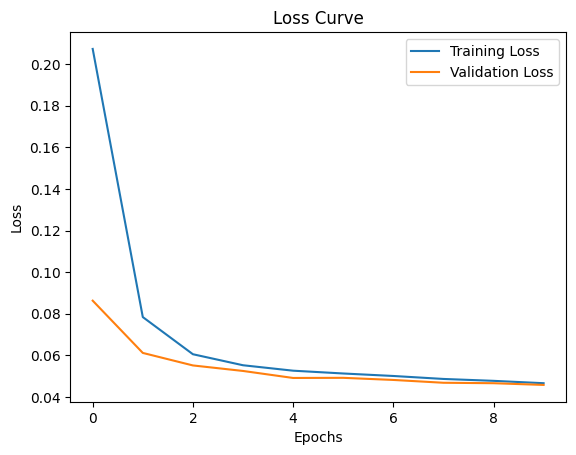

In [215]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [216]:
def build_model(hp):
    model = tf.keras.Sequential()
    
    # Hyperparameter: Number of layers
    num_layers = hp.Int("num_layers", min_value=1, max_value=3, step=1)
    
    for i in range(num_layers):
        # Hidden layer type as a hyperparameter
        hidden_layer_type = hp.Choice("hidden_layer_type", ["LSTM"])
        
        # Add the selected layer type dynamically
        if hidden_layer_type == "LSTM":
            model.add(tf.keras.layers.LSTM(
                units=hp.Int(f"units_layer_{i+1}", min_value=32, max_value=256, step=32),
                activation="tanh",
                return_sequences=(i < num_layers - 1)  # Return sequences except for the last layer
            ))
        elif hidden_layer_type == "GRU":
            model.add(tf.keras.layers.GRU(
                units=hp.Int(f"units_layer_{i+1}", min_value=32, max_value=256, step=32),
                activation="tanh",
                return_sequences=(i < num_layers - 1)
            ))
        elif hidden_layer_type == "SimpleRNN":
            model.add(tf.keras.layers.SimpleRNN(
                units=hp.Int(f"units_layer_{i+1}", min_value=32, max_value=256, step=32),
                activation="tanh",
                return_sequences=(i < num_layers - 1)
            ))
        
        # Add dropout after each recurrent layer
        model.add(tf.keras.layers.Dropout(rate=hp.Float(f"dropout_layer_{i+1}", 0.1, 0.5, step=0.1)))
    
    # Add the output layer
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice("learning_rate", [1e-3, 1e-4, 1e-5])
        ),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

In [217]:
X_train.shape

(259515, 50, 75)

In [218]:
tuner = kt.Hyperband(
    build_model,
    objective=kt.Objective("val_loss", direction="min"),  # Optimize for validation loss
    max_epochs=100,
    factor=3,  # Reduction factor for Hyperband
    directory="my_dir2",
    project_name="hidden_layer_tuning"
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)

Reloading Tuner from my_dir2\hidden_layer_tuning\tuner0.json


In [172]:
tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Search: Running Trial #47

Value             |Best Value So Far |Hyperparameter
1                 |3                 |num_layers
GRU               |LSTM              |hidden_layer_type
256               |256               |units_layer_1
0.1               |0.3               |dropout_layer_1
1e-05             |0.0001            |learning_rate
192               |192               |units_layer_2
0.5               |0.4               |dropout_layer_2
160               |128               |units_layer_3
0.4               |0.3               |dropout_layer_3
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
2642/8110 ━━━━━━━━━━━━━━━━━━━━ 7:55 87ms/step - accuracy: 0.5998 - loss: 0.6815

KeyboardInterrupt: 

In [223]:
best_hps = tuner.get_best_hyperparameters(num_trials=5)[4]
print("Best Hyperparameters:", best_hps.values)

best_model = tuner.hypermodel.build(best_hps)

Best Hyperparameters: {'num_layers': 1, 'hidden_layer_type': 'LSTM', 'units_layer_1': 224, 'dropout_layer_1': 0.1, 'learning_rate': 0.001, 'units_layer_2': 64, 'dropout_layer_2': 0.30000000000000004, 'units_layer_3': 256, 'dropout_layer_3': 0.1, 'tuner/epochs': 2, 'tuner/initial_epoch': 0, 'tuner/bracket': 4, 'tuner/round': 0}


In [233]:
history_continued = best_model.fit(
    X_train, y_train,
    epochs=10,  # Number of training epochs
    batch_size=32,  # Batch size for training
    validation_data=(X_val, y_val),  # Optional validation data to monitor during training
    verbose=1  # To print training progress
)

Epoch 1/10
8110/8110 ━━━━━━━━━━━━━━━━━━━━ 526s 65ms/step - accuracy: 0.9109 - loss: 0.2201 - val_accuracy: 0.8993 - val_loss: 0.2446
Epoch 2/10
8110/8110 ━━━━━━━━━━━━━━━━━━━━ 515s 63ms/step - accuracy: 0.9151 - loss: 0.2102 - val_accuracy: 0.9145 - val_loss: 0.2102
Epoch 3/10
8110/8110 ━━━━━━━━━━━━━━━━━━━━ 513s 63ms/step - accuracy: 0.9197 - loss: 0.2009 - val_accuracy: 0.9277 - val_loss: 0.1870
Epoch 4/10
8110/8110 ━━━━━━━━━━━━━━━━━━━━ 1708s 211ms/step - accuracy: 0.9237 - loss: 0.1911 - val_accuracy: 0.9226 - val_loss: 0.1920
Epoch 5/10
8110/8110 ━━━━━━━━━━━━━━━━━━━━ 647s 80ms/step - accuracy: 0.9264 - loss: 0.1864 - val_accuracy: 0.9264 - val_loss: 0.1861
Epoch 6/10
8110/8110 ━━━━━━━━━━━━━━━━━━━━ 650s 80ms/step - accuracy: 0.9303 - loss: 0.1788 - val_accuracy: 0.9330 - val_loss: 0.1751
Epoch 7/10
8110/8110 ━━━━━━━━━━━━━━━━━━━━ 688s 85ms/step - accuracy: 0.9321 - loss: 0.1721 - val_accuracy: 0.9262 - val_loss: 0.1859
Epoch 8/10
8110/8110 ━━━━━━━━━━━━━━━━━━━━ 701s 86ms/step - accuracy

In [234]:
best_model.save('power_model.h5')

In [237]:
tf.__version__

'2.16.0-rc0'

In [235]:
history.history['loss'] += history_continued.history['loss']
history.history['val_loss'] += history_continued.history['val_loss']

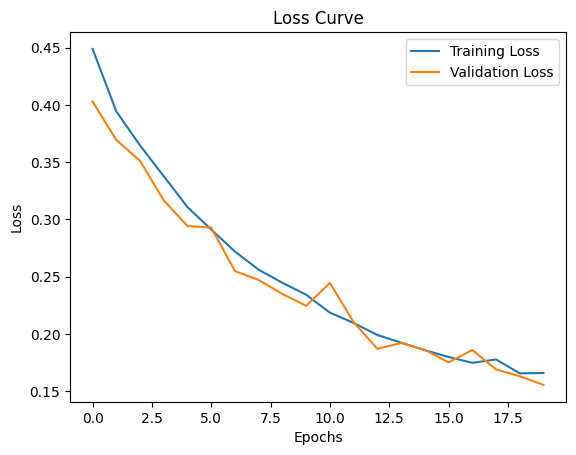

In [236]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [227]:
load_model = tf.keras.models.load_model('power_model.h5')

In [228]:
from sklearn.metrics import confusion_matrix
y_pred = load_model.predict(X_test)

y_pred = K.round(y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

1014/1014 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step
[[14437  2245]
 [  715 15043]]


In [232]:
y_pred_probs = load_model.predict(X_test)
y_pred = (y_pred_probs > .5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, zero_division=0)
recall = recall_score(y_test, y_pred, average=None, zero_division=0)
f1 = f1_score(y_test, y_pred, average=None, zero_division=0)

print('Test Set Evaluation:')
print(f'Accuracy: {accuracy:.4f}')
for i in range(len(precision)):
    print(f"Class {i} - Precision: {precision[i]:.4f}, Recall: {recall[i]:.4f}, F1-Score: {f1[i]:.4f}")

1014/1014 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step
Test Set Evaluation:
Accuracy: 0.9088
Class 0 - Precision: 0.9528, Recall: 0.8654, F1-Score: 0.9070
Class 1 - Precision: 0.8701, Recall: 0.9546, F1-Score: 0.9104


In [ ]:
# JUST Ignore AM DUMB  |
#                     \/

In [ ]:
def assign_timesteps(df):
    timesteps = []
    time = 1
    seen_plcids = set()  # Track the PLCIDs that have appeared
    recent_plcid = -1
    
    for _, row in df.iterrows():
        if row['PLCID'] in seen_plcids and row['PLCID'] != recent_plcid:
            time += 1
            seen_plcids = set()
            seen_plcids.add(row['PLCID'])
            recent_plcid = row['PLCID']
            timesteps.append(time)
        else:
            timesteps.append(time)
            seen_plcids.add(row['PLCID'])
            recent_plcid = row['PLCID']
    # Assign the new timesteps column to the DataFrame
    df['Time'] = timesteps
    return df

In [ ]:
#clean_combined_data = assign_timesteps(clean_combined_data)

In [ ]:
#clean_combined_data

In [ ]:
from sklearn.model_selection import train_test_split

timesteps = clean_combined_data['Time'].unique()
timesteps.sort()

# Define the split points
train_timesteps = timesteps[:int(0.7 * len(timesteps))]  # 70% for training
val_timesteps = timesteps[int(0.7 * len(timesteps)):int(0.85 * len(timesteps))]  # 15% for validation
test_timesteps = timesteps[int(0.85 * len(timesteps)):]  # 15% for testing

# Filter data for each split based on timesteps
train_df = clean_combined_data[clean_combined_data['Time'].isin(train_timesteps)]
val_df = clean_combined_data[clean_combined_data['Time'].isin(val_timesteps)]
test_df = clean_combined_data[clean_combined_data['Time'].isin(test_timesteps)]

In [ ]:
def drop_time(df):
    return df.drop(columns=['Time'])

In [ ]:
train_df = drop_time(train_df)
val_df = drop_time(val_df)
test_df = drop_time(test_df)

In [ ]:
#Just ignore everything below this AHHHHHHH

In [ ]:
def create_adjacency_matrices(df):
    adjacency_matrices = {}
    
    # Get unique timesteps
    timesteps = df['Time'].unique()

    for timestep in timesteps:
        # Filter data for the current timestep
        timestep_data = df[df['Time'] == timestep]
        
        # Get unique PLCIDs for the current timestep
        plcids = timestep_data['PLCID'].unique()
        plcids.sort()
        
        # Create mapping from PLCID to index in adjacency matrix
        plcid_index = {plcid: idx for idx, plcid in enumerate(plcids)}
        
        # Initialize the adjacency matrix for this timestep
        adjacency_matrix = np.zeros((len(plcids), len(plcids)), dtype=float)
        
        # Populate the adjacency matrix based on the connections (columns with x_s)
        for _, row in timestep_data.iterrows():
            source_idx = plcid_index[row['PLCID']]
            
            # Iterate over all connection columns (those ending with '_S')
            for col in timestep_data.columns:
                if col.endswith('_S'):
                    target_plcid = int(col.split('_')[0])  # Extract PLCID from  (e.g., 2_S => PLCID 2)
                    
                    if target_plcid in plcids:  # Ensure the target PLCID is in the list of PLCIDs
                        target_idx = plcid_index[target_plcid]
                        
                        # Get the connection weight
                        connection_weight = row[col]
                        
                        # Update the adjacency matrix with the connection weight
                        adjacency_matrix[source_idx, target_idx] = connection_weight
        
        # Store the adjacency matrix for this timestep
        adjacency_matrices[timestep] = adjacency_matrix
        
    return adjacency_matrices

In [ ]:
train_adjacency_matrices = create_adjacency_matrices(train_df)
val_adjacency_matrices = create_adjacency_matrices(val_df)
test_adjacency_matrices = create_adjacency_matrices(test_df)

In [ ]:
def extract_multi_instance_node_features(df):
    # Here we do not aggregate, and instead stack all measurements of each feature
    feature_columns = ['eth.src', 'eth.dst', 'ip.src', 'ip.dst', 'ip.len', 'tcp.srcport', 'tcp.dstport', 'V1', 'I1', 'Theta', 'P', 'Q',
    'BreakerStatus_1', 'BreakerStatus_10', 'BreakerStatus_11', 'BreakerStatus_12', 'BreakerStatus_13',
    'BreakerStatus_14', 'BreakerStatus_2', 'BreakerStatus_3', 'BreakerStatus_4', 'BreakerStatus_5',
    'BreakerStatus_7', 'BreakerStatus_9', 'BreakerStatus_GEN', 'BreakerStatus_LOAD',
    '_ws.col.Protocol_ARP', '_ws.col.Protocol_ICMP', '_ws.col.Protocol_ICMPv6', '_ws.col.Protocol_IGMPv3',
    '_ws.col.Protocol_Modbus/TCP', '_ws.col.Protocol_OSPF', '_ws.col.Protocol_TCP', '_ws.col.Protocol_TLSv1',
    '_ws.col.Protocol_TLSv1.2', '_ws.col.Protocol_TLSv1.3' ]
    node_features = {}

    for timestep in df['Time'].unique():
        timestep_data = df[df['Time'] == timestep]
        
        # Group by PLCID and stack the feature columns for that timestep
        timestep_features = timestep_data.groupby('PLCID')[feature_columns].apply(lambda x: x.values.tolist())
        
        max_length = max([len(features) for features in timestep_features])
        
        # Pad or trim the feature vectors to the max length
        padded_features = {
            plcid: [features + [0] * (max_length - len(features)) if len(features) < max_length else features[:max_length]
                    for features in timestep_features[plcid]] 
            for plcid in timestep_features.index
        }
        
        node_features[timestep] = padded_features

    return node_features

In [ ]:
# Extract features with multiple instances for each timestep
train_node_features = extract_multi_instance_node_features(train_df)
val_node_features = extract_multi_instance_node_features(val_df)
test_node_features = extract_multi_instance_node_features(test_df)

In [ ]:
train_df[train_df['Time'] == 9]['label'].unique()

In [ ]:
mode_label = train_df[train_df['Time'] == 15710]['label'].mode()[0]
print(f"Most frequent label for timestep 15710: {mode_label}")
train_df.loc[train_df['Time'] == 15710, 'label'] = mode_label

In [ ]:
def create_graph_labels(df):
    labels = df.groupby('Time')['label'].first()  # Use .first() or .mode() to ensure unique labels per timestep
    
    # Now `labels` is a Series with timesteps as the index and the corresponding label as the value
    labels_dict = labels.to_dict()  # Convert the Series to a dictionary
    return labels_dict


In [ ]:
train_labels = create_graph_labels(train_df)
val_labels = create_graph_labels(val_df)
test_labels = create_graph_labels(test_df)